In [1]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import establish_kotte_flux_identifiability
from process_ident_data import process_info_sample
from process_ident_data import parameter_plot_data_per_sample
from plot_ident_results import flux_parameter_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# choose numbr of experimental datasets for which identifiability is to be calculated
choose = range(0, 4896)
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=choose)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info_sample(ident_details,
                                                                                      experimental_datasets,
                                                                                      perturbation_details)

# plot results
# file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
# plot parameters for each flux and the number of data sets that enable their identification
# get data for plots
total_ident_data, fraction_ident_data, all_boolean_p_id = parameter_plot_data_per_sample(original_data_ident, 1)
# plot functions are executed in separate cells below


# get different classes of datasets (containing different experiments)
# from process_ident_data import experiments_in_ident_data
# experiment_sets = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
# exp_data_parameter_info = experiments_in_ident_data(all_boolean_p_id,
#                                           experimental_datasets,
#                                           experiment_sets, [])

# from process_ident_data import experiment_position_based_info
# all_parameter_position_based_info = experiment_position_based_info(exp_data_parameter_info)

# from plot_ident_results import parameter_experiment_type_plot
# parameter_experiment_type_plot(all_parameter_position_based_info)

Final Run Statistics: --- 

 Number of steps                                 : 458
 Number of function evaluations                  : 565
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 20
 Number of nonlinear iterations                  : 561
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0237627676283 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 11
 Number of function evaluations                  : 17
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jaco

Final Run Statistics: --- 

 Number of steps                                 : 575
 Number of function evaluations                  : 735
 Number of Jacobian evaluations                  : 10
 Number of function eval. due to Jacobian eval.  : 30
 Number of error test failures                   : 32
 Number of nonlinear iterations                  : 731
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.031775344442 seconds.
Identifiability for Dataset 1 of 4896: Original ID: 0

Identifiability for Dataset 2 of 4896: Original ID: 1

Identifiability for Dataset 3 of 4896: Original ID: 2

Identifiability for Dataset 4 of 4896: Original ID: 3

Identifiability for Da

kotte_model.py:244: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:251: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_1)))/\
kotte_model.py:314: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:321: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_2)))/\
kotte_model.py:384: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x13*x21*x23 - v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:391: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_nr_1_k3fdp)))/ \
kotte_model.py:454: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:461: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3fdp_nr_2)))/\
kotte_model.py:482: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3pep_nr_1)
ko

Identifiability for Dataset 380 of 4896: Original ID: 379

Identifiability for Dataset 381 of 4896: Original ID: 380

Identifiability for Dataset 382 of 4896: Original ID: 381

Identifiability for Dataset 383 of 4896: Original ID: 382

Identifiability for Dataset 384 of 4896: Original ID: 383

Identifiability for Dataset 385 of 4896: Original ID: 384

Identifiability for Dataset 386 of 4896: Original ID: 385

Identifiability for Dataset 387 of 4896: Original ID: 386

Identifiability for Dataset 388 of 4896: Original ID: 387

Identifiability for Dataset 389 of 4896: Original ID: 388

Identifiability for Dataset 390 of 4896: Original ID: 389

Identifiability for Dataset 391 of 4896: Original ID: 390

Identifiability for Dataset 392 of 4896: Original ID: 391

Identifiability for Dataset 393 of 4896: Original ID: 392

Identifiability for Dataset 394 of 4896: Original ID: 393

Identifiability for Dataset 395 of 4896: Original ID: 394

Identifiability for Dataset 396 of 4896: Original ID: 39

Identifiability for Dataset 723 of 4896: Original ID: 722

Identifiability for Dataset 724 of 4896: Original ID: 723

Identifiability for Dataset 725 of 4896: Original ID: 724

Identifiability for Dataset 726 of 4896: Original ID: 725

Identifiability for Dataset 727 of 4896: Original ID: 726

Identifiability for Dataset 728 of 4896: Original ID: 727

Identifiability for Dataset 729 of 4896: Original ID: 728

Identifiability for Dataset 730 of 4896: Original ID: 729

Identifiability for Dataset 731 of 4896: Original ID: 730

Identifiability for Dataset 732 of 4896: Original ID: 731

Identifiability for Dataset 733 of 4896: Original ID: 732

Identifiability for Dataset 734 of 4896: Original ID: 733

Identifiability for Dataset 735 of 4896: Original ID: 734

Identifiability for Dataset 736 of 4896: Original ID: 735

Identifiability for Dataset 737 of 4896: Original ID: 736

Identifiability for Dataset 738 of 4896: Original ID: 737

Identifiability for Dataset 739 of 4896: Original ID: 73

Identifiability for Dataset 1039 of 4896: Original ID: 1038

Identifiability for Dataset 1040 of 4896: Original ID: 1039

Identifiability for Dataset 1041 of 4896: Original ID: 1040

Identifiability for Dataset 1042 of 4896: Original ID: 1041

Identifiability for Dataset 1043 of 4896: Original ID: 1042

Identifiability for Dataset 1044 of 4896: Original ID: 1043

Identifiability for Dataset 1045 of 4896: Original ID: 1044

Identifiability for Dataset 1046 of 4896: Original ID: 1045

Identifiability for Dataset 1047 of 4896: Original ID: 1046

Identifiability for Dataset 1048 of 4896: Original ID: 1047

Identifiability for Dataset 1049 of 4896: Original ID: 1048

Identifiability for Dataset 1050 of 4896: Original ID: 1049

Identifiability for Dataset 1051 of 4896: Original ID: 1050

Identifiability for Dataset 1052 of 4896: Original ID: 1051

Identifiability for Dataset 1053 of 4896: Original ID: 1052

Identifiability for Dataset 1054 of 4896: Original ID: 1053

Identifiability for Data

Identifiability for Dataset 1348 of 4896: Original ID: 1347

Identifiability for Dataset 1349 of 4896: Original ID: 1348

Identifiability for Dataset 1350 of 4896: Original ID: 1349

Identifiability for Dataset 1351 of 4896: Original ID: 1350

Identifiability for Dataset 1352 of 4896: Original ID: 1351

Identifiability for Dataset 1353 of 4896: Original ID: 1352

Identifiability for Dataset 1354 of 4896: Original ID: 1353

Identifiability for Dataset 1355 of 4896: Original ID: 1354

Identifiability for Dataset 1356 of 4896: Original ID: 1355

Identifiability for Dataset 1357 of 4896: Original ID: 1356

Identifiability for Dataset 1358 of 4896: Original ID: 1357

Identifiability for Dataset 1359 of 4896: Original ID: 1358

Identifiability for Dataset 1360 of 4896: Original ID: 1359

Identifiability for Dataset 1361 of 4896: Original ID: 1360

Identifiability for Dataset 1362 of 4896: Original ID: 1361

Identifiability for Dataset 1363 of 4896: Original ID: 1362

Identifiability for Data

Identifiability for Dataset 1659 of 4896: Original ID: 1658

Identifiability for Dataset 1660 of 4896: Original ID: 1659

Identifiability for Dataset 1661 of 4896: Original ID: 1660

Identifiability for Dataset 1662 of 4896: Original ID: 1661

Identifiability for Dataset 1663 of 4896: Original ID: 1662

Identifiability for Dataset 1664 of 4896: Original ID: 1663

Identifiability for Dataset 1665 of 4896: Original ID: 1664

Identifiability for Dataset 1666 of 4896: Original ID: 1665

Identifiability for Dataset 1667 of 4896: Original ID: 1666

Identifiability for Dataset 1668 of 4896: Original ID: 1667

Identifiability for Dataset 1669 of 4896: Original ID: 1668

Identifiability for Dataset 1670 of 4896: Original ID: 1669

Identifiability for Dataset 1671 of 4896: Original ID: 1670

Identifiability for Dataset 1672 of 4896: Original ID: 1671

Identifiability for Dataset 1673 of 4896: Original ID: 1672

Identifiability for Dataset 1674 of 4896: Original ID: 1673

Identifiability for Data

Identifiability for Dataset 1968 of 4896: Original ID: 1967

Identifiability for Dataset 1969 of 4896: Original ID: 1968

Identifiability for Dataset 1970 of 4896: Original ID: 1969

Identifiability for Dataset 1971 of 4896: Original ID: 1970

Identifiability for Dataset 1972 of 4896: Original ID: 1971

Identifiability for Dataset 1973 of 4896: Original ID: 1972

Identifiability for Dataset 1974 of 4896: Original ID: 1973

Identifiability for Dataset 1975 of 4896: Original ID: 1974

Identifiability for Dataset 1976 of 4896: Original ID: 1975

Identifiability for Dataset 1977 of 4896: Original ID: 1976

Identifiability for Dataset 1978 of 4896: Original ID: 1977

Identifiability for Dataset 1979 of 4896: Original ID: 1978

Identifiability for Dataset 1980 of 4896: Original ID: 1979

Identifiability for Dataset 1981 of 4896: Original ID: 1980

Identifiability for Dataset 1982 of 4896: Original ID: 1981

Identifiability for Dataset 1983 of 4896: Original ID: 1982

Identifiability for Data

Identifiability for Dataset 2285 of 4896: Original ID: 2284

Identifiability for Dataset 2286 of 4896: Original ID: 2285

Identifiability for Dataset 2287 of 4896: Original ID: 2286

Identifiability for Dataset 2288 of 4896: Original ID: 2287

Identifiability for Dataset 2289 of 4896: Original ID: 2288

Identifiability for Dataset 2290 of 4896: Original ID: 2289

Identifiability for Dataset 2291 of 4896: Original ID: 2290

Identifiability for Dataset 2292 of 4896: Original ID: 2291

Identifiability for Dataset 2293 of 4896: Original ID: 2292

Identifiability for Dataset 2294 of 4896: Original ID: 2293

Identifiability for Dataset 2295 of 4896: Original ID: 2294

Identifiability for Dataset 2296 of 4896: Original ID: 2295

Identifiability for Dataset 2297 of 4896: Original ID: 2296

Identifiability for Dataset 2298 of 4896: Original ID: 2297

Identifiability for Dataset 2299 of 4896: Original ID: 2298

Identifiability for Dataset 2300 of 4896: Original ID: 2299

Identifiability for Data

Identifiability for Dataset 2626 of 4896: Original ID: 2625

Identifiability for Dataset 2627 of 4896: Original ID: 2626

Identifiability for Dataset 2628 of 4896: Original ID: 2627

Identifiability for Dataset 2629 of 4896: Original ID: 2628

Identifiability for Dataset 2630 of 4896: Original ID: 2629

Identifiability for Dataset 2631 of 4896: Original ID: 2630

Identifiability for Dataset 2632 of 4896: Original ID: 2631

Identifiability for Dataset 2633 of 4896: Original ID: 2632

Identifiability for Dataset 2634 of 4896: Original ID: 2633

Identifiability for Dataset 2635 of 4896: Original ID: 2634

Identifiability for Dataset 2636 of 4896: Original ID: 2635

Identifiability for Dataset 2637 of 4896: Original ID: 2636

Identifiability for Dataset 2638 of 4896: Original ID: 2637

Identifiability for Dataset 2639 of 4896: Original ID: 2638

Identifiability for Dataset 2640 of 4896: Original ID: 2639

Identifiability for Dataset 2641 of 4896: Original ID: 2640

Identifiability for Data

Identifiability for Dataset 2976 of 4896: Original ID: 2975

Identifiability for Dataset 2977 of 4896: Original ID: 2976

Identifiability for Dataset 2978 of 4896: Original ID: 2977

Identifiability for Dataset 2979 of 4896: Original ID: 2978

Identifiability for Dataset 2980 of 4896: Original ID: 2979

Identifiability for Dataset 2981 of 4896: Original ID: 2980

Identifiability for Dataset 2982 of 4896: Original ID: 2981

Identifiability for Dataset 2983 of 4896: Original ID: 2982

Identifiability for Dataset 2984 of 4896: Original ID: 2983

Identifiability for Dataset 2985 of 4896: Original ID: 2984

Identifiability for Dataset 2986 of 4896: Original ID: 2985

Identifiability for Dataset 2987 of 4896: Original ID: 2986

Identifiability for Dataset 2988 of 4896: Original ID: 2987

Identifiability for Dataset 2989 of 4896: Original ID: 2988

Identifiability for Dataset 2990 of 4896: Original ID: 2989

Identifiability for Dataset 2991 of 4896: Original ID: 2990

Identifiability for Data

Identifiability for Dataset 3283 of 4896: Original ID: 3282

Identifiability for Dataset 3284 of 4896: Original ID: 3283

Identifiability for Dataset 3285 of 4896: Original ID: 3284

Identifiability for Dataset 3286 of 4896: Original ID: 3285

Identifiability for Dataset 3287 of 4896: Original ID: 3286

Identifiability for Dataset 3288 of 4896: Original ID: 3287

Identifiability for Dataset 3289 of 4896: Original ID: 3288

Identifiability for Dataset 3290 of 4896: Original ID: 3289

Identifiability for Dataset 3291 of 4896: Original ID: 3290

Identifiability for Dataset 3292 of 4896: Original ID: 3291

Identifiability for Dataset 3293 of 4896: Original ID: 3292

Identifiability for Dataset 3294 of 4896: Original ID: 3293

Identifiability for Dataset 3295 of 4896: Original ID: 3294

Identifiability for Dataset 3296 of 4896: Original ID: 3295

Identifiability for Dataset 3297 of 4896: Original ID: 3296

Identifiability for Dataset 3298 of 4896: Original ID: 3297

Identifiability for Data

Identifiability for Dataset 3547 of 4896: Original ID: 3546

Identifiability for Dataset 3548 of 4896: Original ID: 3547

Identifiability for Dataset 3549 of 4896: Original ID: 3548

Identifiability for Dataset 3550 of 4896: Original ID: 3549

Identifiability for Dataset 3551 of 4896: Original ID: 3550

Identifiability for Dataset 3552 of 4896: Original ID: 3551

Identifiability for Dataset 3553 of 4896: Original ID: 3552

Identifiability for Dataset 3554 of 4896: Original ID: 3553

Identifiability for Dataset 3555 of 4896: Original ID: 3554

Identifiability for Dataset 3556 of 4896: Original ID: 3555

Identifiability for Dataset 3557 of 4896: Original ID: 3556

Identifiability for Dataset 3558 of 4896: Original ID: 3557

Identifiability for Dataset 3559 of 4896: Original ID: 3558

Identifiability for Dataset 3560 of 4896: Original ID: 3559

Identifiability for Dataset 3561 of 4896: Original ID: 3560

Identifiability for Dataset 3562 of 4896: Original ID: 3561

Identifiability for Data

Identifiability for Dataset 3820 of 4896: Original ID: 3819

Identifiability for Dataset 3821 of 4896: Original ID: 3820

Identifiability for Dataset 3822 of 4896: Original ID: 3821

Identifiability for Dataset 3823 of 4896: Original ID: 3822

Identifiability for Dataset 3824 of 4896: Original ID: 3823

Identifiability for Dataset 3825 of 4896: Original ID: 3824

Identifiability for Dataset 3826 of 4896: Original ID: 3825

Identifiability for Dataset 3827 of 4896: Original ID: 3826

Identifiability for Dataset 3828 of 4896: Original ID: 3827

Identifiability for Dataset 3829 of 4896: Original ID: 3828

Identifiability for Dataset 3830 of 4896: Original ID: 3829

Identifiability for Dataset 3831 of 4896: Original ID: 3830

Identifiability for Dataset 3832 of 4896: Original ID: 3831

Identifiability for Dataset 3833 of 4896: Original ID: 3832

Identifiability for Dataset 3834 of 4896: Original ID: 3833

Identifiability for Dataset 3835 of 4896: Original ID: 3834

Identifiability for Data

Identifiability for Dataset 4080 of 4896: Original ID: 4079

Identifiability for Dataset 4081 of 4896: Original ID: 4080

Identifiability for Dataset 4082 of 4896: Original ID: 4081

Identifiability for Dataset 4083 of 4896: Original ID: 4082

Identifiability for Dataset 4084 of 4896: Original ID: 4083

Identifiability for Dataset 4085 of 4896: Original ID: 4084

Identifiability for Dataset 4086 of 4896: Original ID: 4085

Identifiability for Dataset 4087 of 4896: Original ID: 4086

Identifiability for Dataset 4088 of 4896: Original ID: 4087

Identifiability for Dataset 4089 of 4896: Original ID: 4088

Identifiability for Dataset 4090 of 4896: Original ID: 4089

Identifiability for Dataset 4091 of 4896: Original ID: 4090

Identifiability for Dataset 4092 of 4896: Original ID: 4091

Identifiability for Dataset 4093 of 4896: Original ID: 4092

Identifiability for Dataset 4094 of 4896: Original ID: 4093

Identifiability for Dataset 4095 of 4896: Original ID: 4094

Identifiability for Data

Identifiability for Dataset 4404 of 4896: Original ID: 4403

Identifiability for Dataset 4405 of 4896: Original ID: 4404

Identifiability for Dataset 4406 of 4896: Original ID: 4405

Identifiability for Dataset 4407 of 4896: Original ID: 4406

Identifiability for Dataset 4408 of 4896: Original ID: 4407

Identifiability for Dataset 4409 of 4896: Original ID: 4408

Identifiability for Dataset 4410 of 4896: Original ID: 4409

Identifiability for Dataset 4411 of 4896: Original ID: 4410

Identifiability for Dataset 4412 of 4896: Original ID: 4411

Identifiability for Dataset 4413 of 4896: Original ID: 4412

Identifiability for Dataset 4414 of 4896: Original ID: 4413

Identifiability for Dataset 4415 of 4896: Original ID: 4414

Identifiability for Dataset 4416 of 4896: Original ID: 4415

Identifiability for Dataset 4417 of 4896: Original ID: 4416

Identifiability for Dataset 4418 of 4896: Original ID: 4417

Identifiability for Dataset 4419 of 4896: Original ID: 4418

Identifiability for Data

Identifiability for Dataset 4741 of 4896: Original ID: 4740

Identifiability for Dataset 4742 of 4896: Original ID: 4741

Identifiability for Dataset 4743 of 4896: Original ID: 4742

Identifiability for Dataset 4744 of 4896: Original ID: 4743

Identifiability for Dataset 4745 of 4896: Original ID: 4744

Identifiability for Dataset 4746 of 4896: Original ID: 4745

Identifiability for Dataset 4747 of 4896: Original ID: 4746

Identifiability for Dataset 4748 of 4896: Original ID: 4747

Identifiability for Dataset 4749 of 4896: Original ID: 4748

Identifiability for Dataset 4750 of 4896: Original ID: 4749

Identifiability for Dataset 4751 of 4896: Original ID: 4750

Identifiability for Dataset 4752 of 4896: Original ID: 4751

Identifiability for Dataset 4753 of 4896: Original ID: 4752

Identifiability for Dataset 4754 of 4896: Original ID: 4753

Identifiability for Dataset 4755 of 4896: Original ID: 4754

Identifiability for Dataset 4756 of 4896: Original ID: 4755

Identifiability for Data

kotte_model.py:649: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


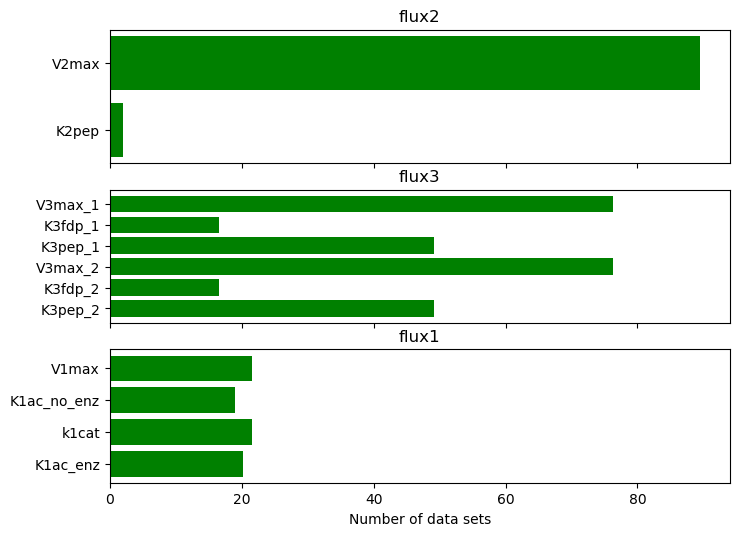

In [2]:
flux_parameter_plot(fraction_ident_data)

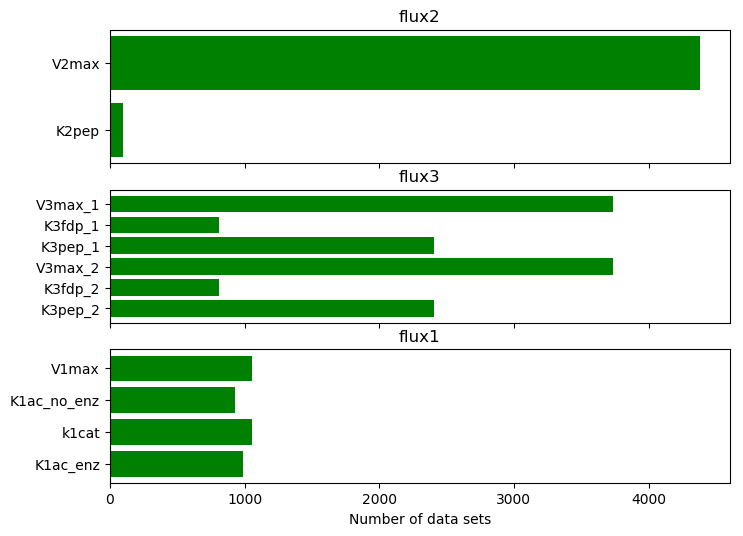

In [3]:
flux_parameter_plot(total_ident_data)